In [1]:
from collections import defaultdict

import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from plotly.graph_objs import Figure, Bar, Layout
from wordcloud import WordCloud, STOPWORDS

from src.data import get_news

In [2]:
all_news = get_news()

In [3]:
Figure(
    data=[
        Bar(x=[True],  y=[sum([1 for news in all_news if news.is_true])]),
        Bar(x=[False], y=[sum([1 for news in all_news if news.is_fake])]),
    ],
    layout=Layout(showlegend=False, title="News proportion", template="plotly_white")
)

In [4]:
days = {news.created_on for news in all_news if news.created_on and 2015 < news.created_on.year < 2018}
days = sorted(days)

news_per_day = defaultdict(list)

for news in all_news:
    news_per_day[news.created_on].append(news)

Figure(
    data=[
        Bar(x=days, y=[sum([1 for news in news_per_day[day] if news.is_true]) for day in days]),
        Bar(x=days, y=[sum([1 for news in news_per_day[day] if news.is_fake]) for day in days]),
    ],
    layout=Layout(title="When news were created", template="plotly_white")
)

In [5]:
subjects = list({news.subject for news in all_news})
Figure(
    data=[
        Bar(x=[subject], y=[sum([1 for news in all_news if  news.subject == subject])])
        for subject in subjects
    ],
    layout=Layout(showlegend=False, title="Subjects distribution", template="plotly_white")
)

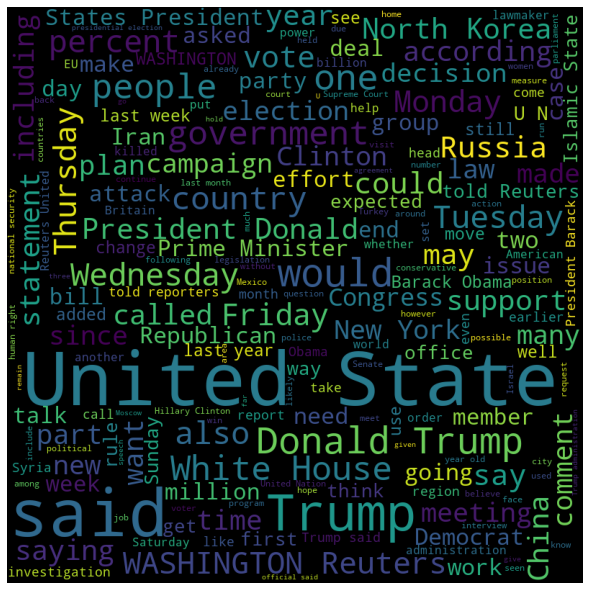

In [6]:
all_texts = ' '.join([str(news.content) for news in all_news if news.is_true])

word_cloud = WordCloud(
    width=800, height=800,
    stopwords=stopwords.words("english"),
    min_font_size=10
).generate(all_texts)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

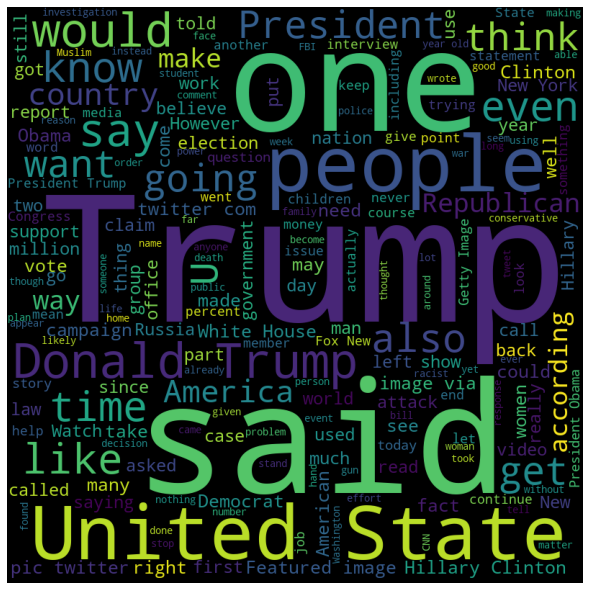

In [7]:
all_texts = ' '.join([str(news.content) for news in all_news if news.is_fake])

word_cloud = WordCloud(
    width=800, height=800,
    stopwords=stopwords.words("english"),
    min_font_size=10
).generate(all_texts)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

In [8]:
missing_title, missing_content, missing_is_fake, missing_subject, missing_created_on  = 0, 0, 0, 0, 0

for news in all_news:
    if not news.title:
        missing_title += 1

    if not news.content:
        missing_content += 1

    if news.is_fake is None:
        missing_is_fake += 1

    if not news.subject:
        missing_subject += 1

    # Initially missing_created_on = 10
    if not news.created_on:
        missing_created_on += 1


print(missing_title, missing_content, missing_is_fake, missing_subject, missing_created_on)

0 0 0 0 0
